### Conexión MySQL y Python para obtener la información
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

In [ ]:
# IMPORTAR LAS LIBRERIAS NECESARIAS
import mysql.connector
import pandas as pd

# CREO UNA CONEXION PARA LA BASE DE DATOS 'TRADES4'
cnx = mysql.connector.connect(
    user='root',
    password='250301',
    host='localhost',
    database='trades4')
cursor = cnx.cursor()

# Función para obtener los nombres de las tablas
def get_table_names(cursor):
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()
    table_names = [table_name for (table_name,) in tables]
    return table_names

# Función para obtener y almacenar cada tabla como un DataFrame de Pandas
def get_tables_as_dataframes(cursor, table_names):
    dfs = {}
    for table_name in table_names:
        cursor.execute(f"SELECT * FROM {table_name}")
        rows = cursor.fetchall()
        df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
        dfs[table_name] = df
    return dfs

# Función para mostrar las columnas de cada tabla
def show_columns_of_tables(table_names, cursor):
    for table_name in table_names:
        cursor.execute(f"SHOW COLUMNS FROM {table_name}")
        columns = cursor.fetchall()
        column_names = [column[0] for column in columns]
        print(f"Tabla'{table_name}' - Columnas: {column_names}")

tables = get_table_names(cursor)

    
show_columns_of_tables(tables, cursor)

dfs = get_tables_as_dataframes(cursor, tables)

    # Crear variables globales para cada DataFrame con el nombre df_table_name
for table_name, df in dfs.items():
    globals()[f"df_{table_name}"] = df

cursor.close()
cnx.close()

Exercici 1: Mostrat una variable numèrica
Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

Situación: La empresa desea verificar qué edades son las más habituales para establecer una estrategia para mejorar los productos y todas las plataformas para esta edad.

Para conseguir este objetivo, seguiremos estos pasos:
- Obtener a partir de la birt_date la edad.
- Calcular la frecuencia de cada edad
- Crear los rangos de edad.
- Calcular la frecuencia de cada rango.
- Visualizar la distribución de los rangos de edad.
- 
¿La edad de los usuarios sigue una distribución normal?
¿Hay outliers significativos en la edad?
¿Cómo varía la edad según otras variables (si las hay) en tu conjunto de datos?



|   Frequency |   count |
|------------:|--------:|
|          23 |       8 |
|          24 |       7 |
|          25 |      12 |
|          26 |      11 |
|          27 |      10 |
|          28 |      13 |
|          29 |      10 |
|          30 |      13 |
|          31 |      13 |
|          32 |      12 |
|          33 |      15 |
|          34 |      19 |
|          35 |      14 |
|          36 |      12 |
|          37 |      22 |
|          38 |       8 |
|          39 |      10 |
|          40 |      12 |
|          41 |      15 |
|          42 |      18 |
|          43 |      10 |
|          44 |       8 |
|          45 |       3 |

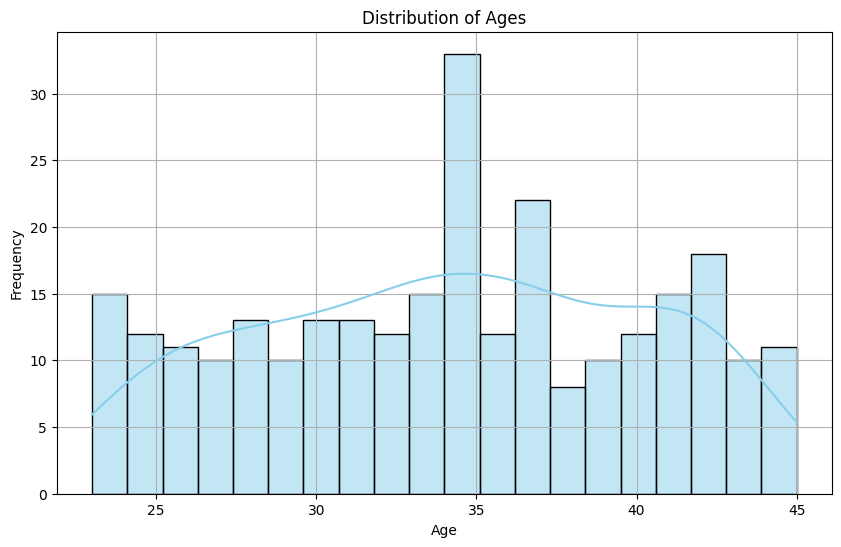

C:\Users\Marcial\AppData\Local\Temp\ipykernel_11672\3102618020.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_users['age'], shade=True, color='skyblue')


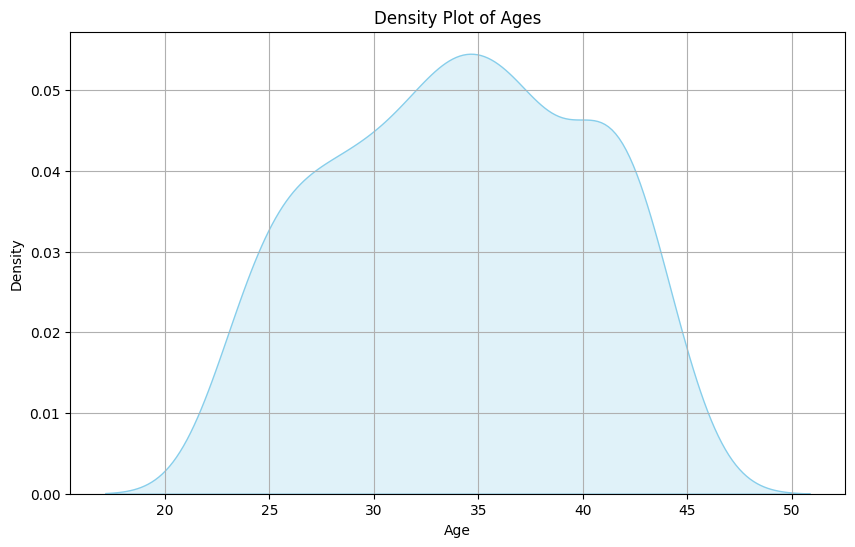

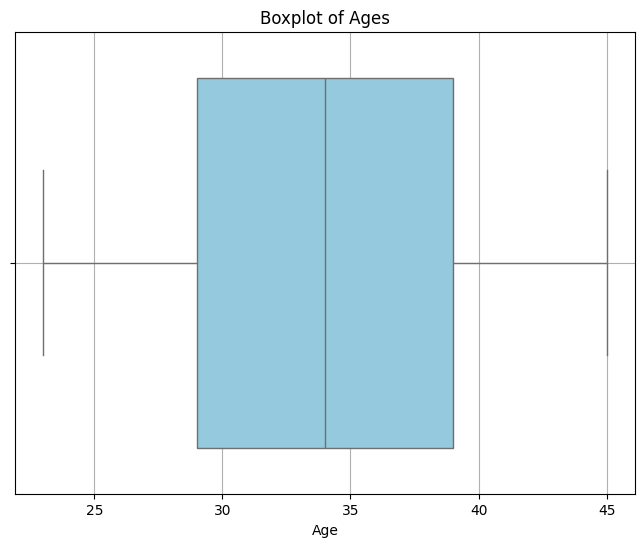

In [59]:
# Importar bibliotecas necesarias
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Suponiendo que df_users es tu DataFrame de usuarios

# Convertir la columna 'birth_date' a formato de fecha
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], format='%b %d, %Y')

# Calcular la edad de cada usuario en años y crear una nueva columna 'age'
df_users['age'] = df_users['birth_date'].apply(lambda x: (datetime.today() - x).days // 365)

# Calcular la frecuencia de cada edad y ordenar por frecuencia de mayor a menor
age_counts = df_users['age'].value_counts().sort_index()

# Mostrar los datos en formato Markdown
markdown_text = age_counts.reset_index().rename(columns={'index': 'Age', 'age': 'Frequency'}).to_markdown(index=False)
display(Markdown(markdown_text))

# Crear histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Gráfico de densidad de edades
plt.figure(figsize=(10, 6))
sns.kdeplot(df_users['age'], shade=True, color='skyblue')
plt.title('Density Plot of Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Boxplot de edades
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_users['age'], color='skyblue')
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Convertir la columna 'birth_date' a formato de fecha
df_users['birth_date'] = pd.to_datetime(df_users['birth_date'], format='%b %d, %Y')

# Calcular la edad de cada usuario y crear una nueva columna 'age'
df_users['age'] = df_users['birth_date'].apply(lambda x: (datetime.today() - x).days // 365)

# Definir la función para agrupar las edades en rangos de 10 años
def age_group(age):
    return f"{(age // 10) * 10}-{(age // 10) * 10 + 9}"

# Aplicar la función para crear una nueva columna 'age_group'
df_users['age_group'] = df_users['age'].apply(age_group)

# Calcular la frecuencia de cada grupo de edad y ordenar de mayor a menor frecuencia
age_group_counts = df_users['age_group'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

#  VISUALIZAR LA DISTRIBUCIÓN DE LAS EDADES
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], bins=40, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# PASO 3: IDENTIFICAR LAS EDADES MÁS HABITUALES
common_ages = age_counts[age_counts == age_counts.max()]
print("Edades más comunes:")
print(common_ages)


# PASO 1: CREAR LOS RANGOS DE EDAD. 
# DEFINIREMOS RANGOS DE EDAD PERSONALIZADOS PARA DIVIDIR LAS EDADES EN INTERVALOS, POR EJEMPLO, DE 10 AÑOS
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_users['age_range'] = pd.cut(df_users['age'], bins=bins, labels=labels, right=False)

# PASO 2: CALCULAR LA FRECUENCIA DE CADA RANGO DE EDAD
age_range_counts = df_users['age_range'].value_counts().sort_index()

# Paso 3: Visualizar la distribución de los rangos de edad
plt.figure(figsize=(12, 6))
age_range_counts.plot(kind='bar')
plt.title('Distribución de Rangos de Edad')
plt.xlabel('Rangos de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Ejemplo: Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()




# Calcular la frecuencia de cada edad
age_counts = df_users['age'].value_counts().sort_index()
print(age_counts)
